In [1]:
##### # Imports

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
from random import randint

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

import treeinterpreter.treeinterpreter as ti

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

##import model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn import metrics



# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# LIME for explaining predictions
import lime 
import lime.lime_tabular

In [2]:
# Read in data into dataframes 
train_features = pd.read_csv('data/training_features_proc.csv')
test_features = pd.read_csv('data/testing_features_proc.csv')
train_labels = pd.read_csv('data/training_labels_proc.csv', names= ['score'])
test_labels = pd.read_csv('data/testing_labels_proc.csv' , names= ['score'])

# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (69496, 44)
Testing Feature Size:   (29784, 44)
Training Labels Size:   (69496, 1)
Testing Labels Size:    (29784, 1)


In [3]:
train_features.head()

,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,log_Current Credit Balance,log_Maximum Open Credit,Term_Long Term,Term_Short Term,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Credit Score
0,991857.0,15456.31,16.0,11,0,79724,183172.0,0.0,0.0,11.286326,12.118181,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,728.0
1,1847712.0,20632.86,23.4,10,0,424574,1022054.0,0.0,0.0,12.958842,13.837325,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,744.0
2,782838.0,8024.08,26.0,5,1,79496,286770.0,1.0,0.0,11.283462,12.566436,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,729.0
3,736402.0,11843.84,11.8,8,0,56639,388080.0,0.0,0.0,10.944453,12.868967,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,723.0
4,1037172.0,24805.45,12.6,9,1,137180,216128.0,1.0,0.0,11.829049,12.283626,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,640.0


In [4]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

In [5]:
train_X , valid_X = split_vals(train_features.drop(columns="Credit Score"), 40000)
train_y , valid_y = split_vals(train_labels, 40000)
valid_y = valid_y['score']
train_y = train_y['score']

## Define loss func and print methods

In [6]:
def mse(x,y): return np.abs(y-x).mean()
def print_score(m):
    res = [mse(m.predict(train_X), train_y), mse(m.predict(valid_X), valid_y),
                m.score(train_X, train_y), m.score(valid_X, valid_y)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [60]:
## Default model
# m =  RandomForestRegressor(max_features='auto', criterion='friedman_mse', max_depth=15,max_leaf_nodes=None, 
#                                  min_samples_split=6, min_samples_leaf=1, n_estimators=200,n_jobs=-1, min_weight_fraction_leaf=0.0)

m = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=15,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=6,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=42, subsample=1.0, verbose=0,
             warm_start=False)
%time m.fit(train_X, train_y)


Wall time: 7min 8s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='huber', max_depth=15,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=6,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [63]:
y = m.predict(valid_X)

In [64]:
res = mse(y, valid_y)
res

13.036406443603342

In [65]:
print_score(m)

[1.705709298131326, 13.036406443603342, 0.9759069445167086, 0.37113509259834276]


In [66]:
valid_X.shape

(29496, 43)

In [70]:
m.estimators_[0][0]

DecisionTreeRegressor(criterion='friedman_mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=6,
                      min_weight_fraction_leaf=0.0, presort='auto',
                      random_state=<mtrand.RandomState object at 0x0000021664B353F0>,
                      splitter='best')

In [71]:
y = []
for i in m.estimators_:
    y.append(i[0].predict(valid_X)) 

In [72]:
y[4].shape

(29496,)

In [73]:
test_row = valid_X.values[None,3]

In [74]:
test_row

array([[8.45424000e+05, 1.55701200e+04, 2.91000000e+01, 1.90000000e+01,
        0.00000000e+00, 5.19384000e+05, 1.31021000e+06, 0.00000000e+00,
        0.00000000e+00, 1.31603988e+01, 1.40856980e+01, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [75]:
prediction, bias, contributions = ti.predict(m, test_row)


AttributeError: 'GradientBoostingRegressor' object has no attribute 'n_outputs_'

In [76]:
contributs = pd.DataFrame({'name': valid_X.columns, 'values': contributions[0]})
contributs.sort_values(by = 'values', ascending=False)

,name,values
12,Term_Short Term,6.631743
10,log_Maximum Open Credit,5.589731
6,Maximum Open Credit,5.084878
1,Monthly Debt,1.951980
0,Annual Income,1.795307
2,Years of Credit History,0.548443
30,Purpose_Debt Consolidation,0.407462
4,Number of Credit Problems,0.373414
25,Home Ownership_Home Mortgage,0.330821
38,Purpose_other,0.168521


In [77]:
# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': list(train_X.columns), 
                                'importance': m.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)

,feature,importance
0,Annual Income,0.172699
1,Term_Short Term,0.115424
2,Monthly Debt,0.098374
3,Years of Credit History,0.091619
4,log_Maximum Open Credit,0.077687
5,Maximum Open Credit,0.074481
6,Current Credit Balance,0.063739
7,log_Current Credit Balance,0.059649
8,Number of Open Accounts,0.058831
9,Term_Long Term,0.056291


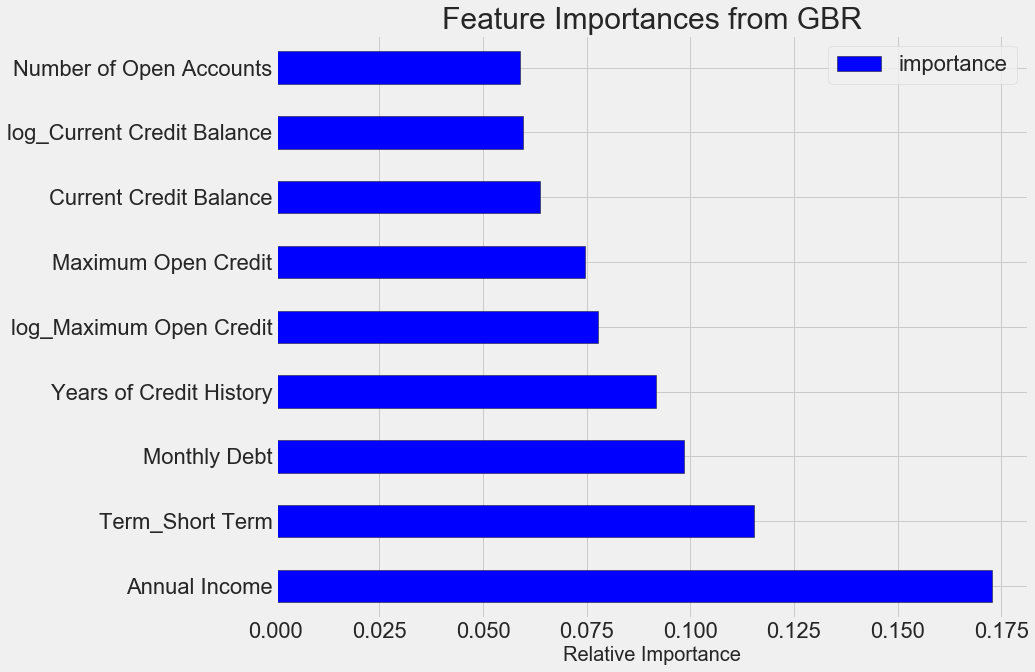

In [79]:
figsize(12, 10)
plt.style.use('fivethirtyeight')

# Plot the 10 most important features in a horizontal bar chart
feature_results.loc[:8, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances from GBR', size = 30);

In [80]:
# Extract the names of the most important features
most_important_features = feature_results['feature'][:10]

# Find the index that corresponds to each feature name
indices = [list(train_features.columns).index(x) for x in most_important_features]

# Keep only the most important features
X_reduced = train_X.iloc[:, indices]
X_test_reduced = valid_X.iloc[:, indices]

print('Most important training features shape: ', X_reduced.shape)
print('Most important testing  features shape: ', X_test_reduced.shape)

Most important training features shape:  (40000, 10)
Most important testing  features shape:  (29496, 10)


In [81]:
lr = LinearRegression()

# Fit on full set of features
lr.fit(train_X,train_y )
lr_full_pred = lr.predict(valid_X)

# Fit on reduced set of features
lr.fit(X_reduced, train_y)
lr_reduced_pred = lr.predict(X_test_reduced)

# Display results
print('Linear Regression Full Results: MAE =    %0.4f.' % mse(valid_y, lr_full_pred))
print('Linear Regression Reduced Results: MAE = %0.4f.' % mse(valid_y, lr_reduced_pred))

Linear Regression Full Results: MAE =    16.9162.
Linear Regression Reduced Results: MAE = 17.1460.


In [82]:
## Default model
# model_reduced = RandomForestRegressor(max_features='auto', criterion='friedman_mse', max_depth=15,max_leaf_nodes=None, 
#                                  min_samples_split=6, min_samples_leaf=1, n_estimators=200,n_jobs=-1, min_weight_fraction_leaf=0.0)

model_reduced = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=15,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=6,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=42, subsample=1.0, verbose=0,
             warm_start=False)

%time model_reduced.fit(X_reduced, train_y)
model_reduced_pred = model_reduced.predict(X_test_reduced)




Wall time: 2min 23s


In [83]:
print('Gradient Boosted Reduced Results: MAE = %0.4f' % mse(valid_y, model_reduced_pred))

Gradient Boosted Reduced Results: MAE = 13.3706


## Locally Interpretable Model-agnostic Explanations
We will look at using LIME to explain individual predictions made the by the model. LIME is a relatively new effort aimed at showing how a machine learning model thinks by approximating the region around a prediction with a linear model.

We will look at trying to explain the predictions on an example the model gets very wrong and an example the model gets correct. We will restrict ourselves to using the reduced set of 10 features to aid interpretability. The model trained on the 10 most important features is slightly less accurate, but we generally have to trade off accuracy for interpretability!

In [84]:
y = np.array(train_labels).reshape((-1,))
y_test = np.array(valid_y).reshape((-1,))
y

array([728., 744., 729., ..., 709., 735., 738.])

In [85]:
# Find the residuals
residuals = abs(model_reduced_pred - y_test)
    
# Exact the worst and best prediction
wrong = X_test_reduced.values[np.argmax(residuals), :]
right = X_test_reduced.values[np.argmin(residuals), :]

In [91]:
X_reduced.head()

,Annual Income,Term_Short Term,Monthly Debt,Years of Credit History,log_Maximum Open Credit,Maximum Open Credit,Current Credit Balance,log_Current Credit Balance,Number of Open Accounts,Term_Long Term
0,991857.0,1,15456.31,16.0,12.118181,183172.0,79724,11.286326,11,0
1,1847712.0,1,20632.86,23.4,13.837325,1022054.0,424574,12.958842,10,0
2,782838.0,1,8024.08,26.0,12.566436,286770.0,79496,11.283462,5,0
3,736402.0,1,11843.84,11.8,12.868967,388080.0,56639,10.944453,8,0
4,1037172.0,1,24805.45,12.6,12.283626,216128.0,137180,11.829049,9,0


In [92]:
# Create a lime explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_reduced.values, 
                                                   categorical_features= [1, 9],
                                                   mode = 'regression',
                                                   training_labels = y,
                                                   feature_names = list(most_important_features))

Prediction: 726.8087
Actual Value: 587.0000


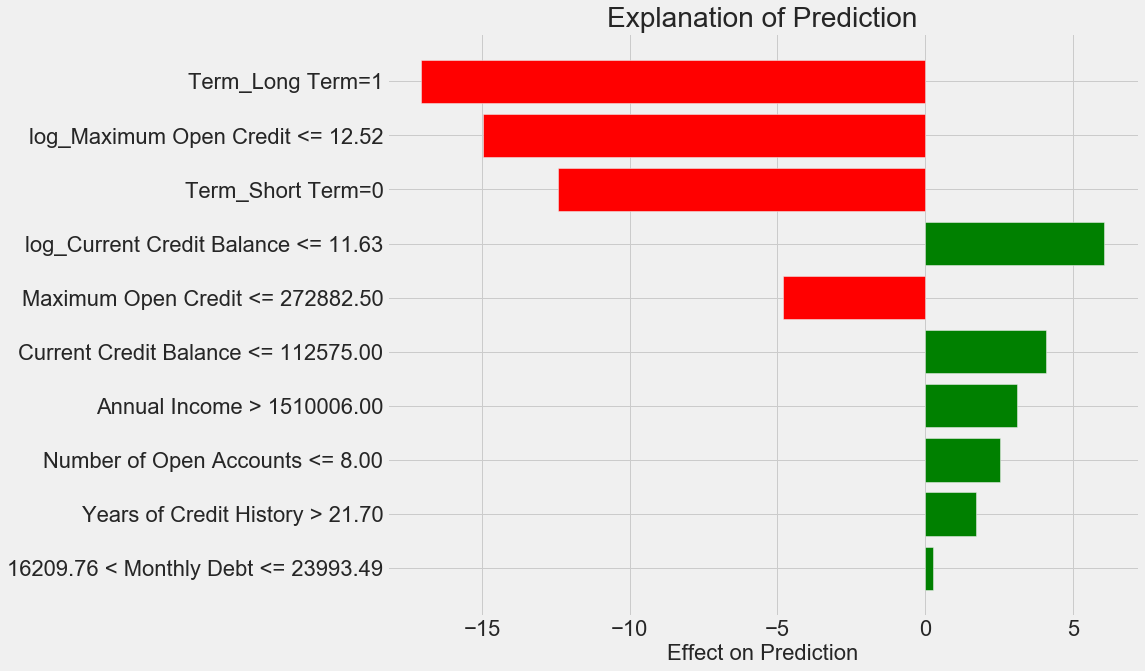

In [93]:
# Display the predicted and true value for the wrong instance
print('Prediction: %0.4f' % model_reduced.predict(wrong.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmax(residuals)])

# Explanation for wrong prediction
wrong_exp = explainer.explain_instance(data_row = wrong, 
                                       predict_fn = model_reduced.predict)

# Plot the prediction explaination
wrong_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

In [94]:
print('Actual Value: 586.00')
wrong_exp.show_in_notebook(show_predicted_value=True)


Actual Value: 586.00


Prediction: 729.0002
Actual Value: 729.0000


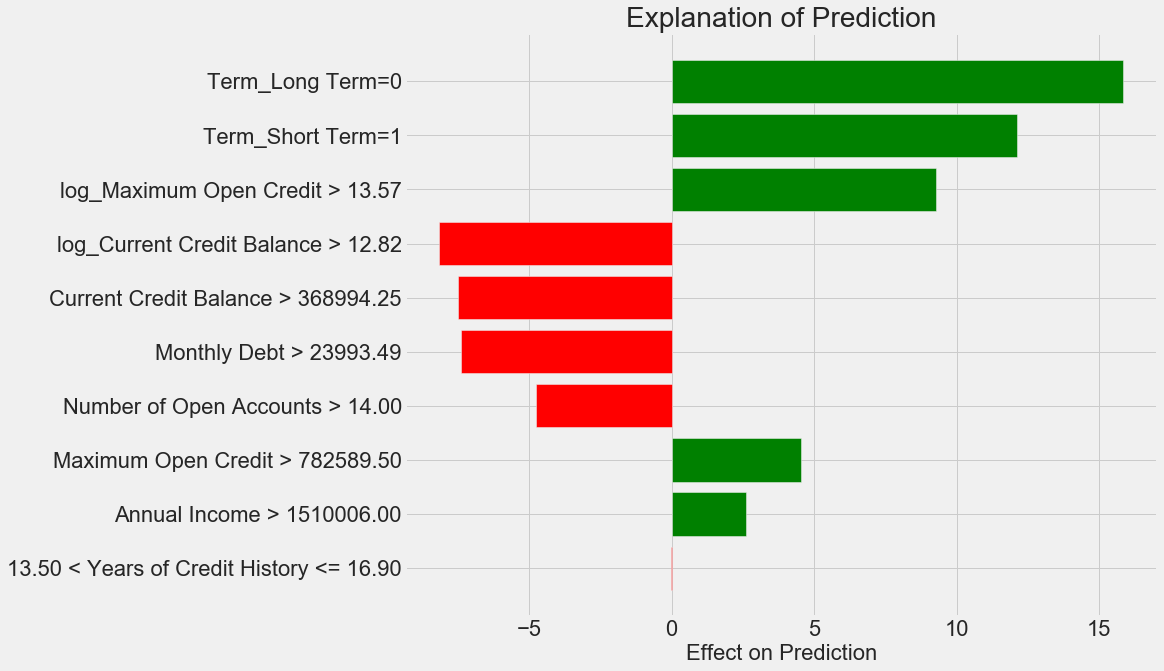

In [95]:

# Display the predicted and true value for the wrong instance
print('Prediction: %0.4f' % model_reduced.predict(right.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmin(residuals)])

# Explanation for wrong prediction
right_exp = explainer.explain_instance(right, model_reduced.predict, num_features=10)
right_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

In [97]:
print('Actual Value: 729.0000')
right_exp.show_in_notebook(show_predicted_value=True)

Actual Value: 729.0000


In [101]:
from sklearn.tree import export_graphviz
# Extract a single tree
single_tree = model_reduced.estimators_[5][0]

export_graphviz(single_tree, out_file = 'GBR_tree_3.dot',
                     rounded = True, 
                     feature_names = most_important_features,
                     filled = True,
                   max_depth=3)

single_tree

DecisionTreeRegressor(criterion='friedman_mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=6,
                      min_weight_fraction_leaf=0.0, presort='auto',
                      random_state=<mtrand.RandomState object at 0x0000021664B9EEA0>,
                      splitter='best')

In [99]:
## Reduce max depth

export_graphviz(single_tree, out_file = 'GBR_tree_small.dot',
                     rounded = True, 
                     feature_names = most_important_features,
                     filled = True,
                     max_depth=2)

![alt text](tree_small.png "Title")

In [26]:
gm = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=15,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=6,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=42, subsample=1.0, verbose=0,
             warm_start=False)

In [27]:
gm.fit(train_X, train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=15,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=6,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             n_iter_no_change=None, presort='auto', random_state=42,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [28]:
print_score(gm)

[1.3931366562027194, 13.10935216236189, 0.9813907323612086, 0.37300547310024945]


In [7]:
criterion = ['mse', 'mae']
# Number of trees used in the boosting process
n_estimators = [100,200,300, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15, 20]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8, 10]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10, 15]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]


# Define the grid of hyperparameters to search
hyperparameter_gridr = {'criterion' : criterion,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [8]:
# Create the model to use for hyperparameter tuning
model_r = RandomForestRegressor(random_state = 42, oob_score = True,
                        verbose = True)


In [9]:
# Set up the random search with 4-fold cross validation
random_cv_r = RandomizedSearchCV(estimator=model_r,
                               param_distributions=hyperparameter_gridr,
                               n_iter=20, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [10]:
# Fit on the training data
random_cv_r.fit(train_X, train_y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 1541.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 2435.4min finished
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:  4.9min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=True, random_state=42, verbose=True, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'criterion': ['mse', 'mae'], 'n_estimators': [100, 200, 300, 500, 900, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15, 20], 'min_samples_leaf': [1, 2, 4, 6, 8, 10], 'min_samples_split': [2, 4, 6, 10, 15], 'max_features': ['auto', 'sqrt', 'log2', None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=1)

In [11]:
# Get all of the cv results and sort by the test performance
random_results_r = pd.DataFrame(random_cv_r.cv_results_).sort_values('mean_test_score', ascending = False)

random_results_r.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
19,301.733067,22.447059,2.977705,0.224358,900,10,1,auto,15,mse,"{'n_estimators': 900, 'min_samples_split': 10,...",-13.940330,-13.978580,-13.904096,-13.941002,0.030411,1,-10.206568,-10.169936,-10.171357,-10.182620,0.016944
9,88208.645309,2183.358152,2.700780,0.102142,1500,10,6,None,10,mae,"{'n_estimators': 1500, 'min_samples_split': 10...",-14.619908,-14.197517,-14.755011,-14.524148,0.237453,2,-13.493277,-12.818500,-13.653963,-13.321913,0.361961
7,25.858209,0.146193,1.307838,0.014252,300,6,1,sqrt,20,mse,"{'n_estimators': 300, 'min_samples_split': 6, ...",-14.826794,-14.955672,-14.723468,-14.835311,0.094987,3,-10.357733,-10.256389,-10.416794,-10.343638,0.066239
18,79.731194,1.151480,3.714404,0.153478,1100,2,8,sqrt,20,mse,"{'n_estimators': 1100, 'min_samples_split': 2,...",-15.162814,-15.322453,-15.055104,-15.180123,0.109828,4,-13.555829,-13.463419,-13.548511,-13.522586,0.041944
13,125.187013,0.567198,0.854050,0.016734,900,6,6,None,5,mse,"{'n_estimators': 900, 'min_samples_split': 6, ...",-15.748430,-15.656650,-15.494924,-15.633338,0.104799,5,-15.595329,-15.350782,-15.447969,-15.464693,0.100534
10,152.764292,0.344896,1.024927,0.003292,1100,2,1,auto,5,mse,"{'n_estimators': 1100, 'min_samples_split': 2,...",-15.765102,-15.675090,-15.503832,-15.648011,0.108369,6,-15.608947,-15.366683,-15.455215,-15.476948,0.100090
12,9575.171041,282.613055,0.778918,0.020260,1100,6,1,sqrt,5,mae,"{'n_estimators': 1100, 'min_samples_split': 6,...",-16.327136,-16.331599,-16.198585,-16.285775,0.061678,7,-16.294623,-16.135624,-16.212500,-16.214249,0.064923
0,6748.816818,352.942527,0.617016,0.025884,900,10,6,log2,5,mae,"{'n_estimators': 900, 'min_samples_split': 10,...",-16.520677,-16.488071,-16.422508,-16.477086,0.040823,8,-16.493233,-16.321345,-16.444195,-16.419591,0.072298
3,31572.323687,509.563682,0.419546,0.012197,900,4,8,auto,2,mae,"{'n_estimators': 900, 'min_samples_split': 4, ...",-16.514758,-16.546131,-16.482056,-16.514315,0.026160,9,-16.483724,-16.485057,-16.514411,-16.494397,0.014162
4,7204.549039,228.540497,0.129321,0.023830,200,15,2,None,2,mae,"{'n_estimators': 200, 'min_samples_split': 15,...",-16.533826,-16.578081,-16.496676,-16.536194,0.033275,10,-16.501757,-16.516684,-16.527807,-16.515416,0.010673


In [12]:
random_cv_r.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=1,
           oob_score=True, random_state=42, verbose=True, warm_start=False)

In [16]:
train_y.mean()

716.2470493372732

In [7]:
final_model_r = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=1,
           oob_score=True, random_state=42, verbose=True, warm_start=False)

In [8]:
final_model_r.fit(train_X, train_y)

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:  5.1min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=1,
           oob_score=True, random_state=42, verbose=True, warm_start=False)

In [9]:
y_pred = final_model_r.predict(valid_X)

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    4.7s finished


In [10]:
def accuracy(y_labels, y_preds):
    ### Input:
    ## y_labels the labels of the validation set
    ## y_preds the predictions of the model
    
    err = mse(y_labels, y_preds)
    diff = (y_labels.max() - y_labels.min())
    accuracy = ((diff - err)/diff) * 100
    print("Accuracy:", accuracy)
    print("Error(MAE): ", err)
    return [accuracy, err]

In [11]:
acc = accuracy(valid_y, y_pred)

Accuracy: 91.76567490682748
Error(MAE):  13.66897965466638


In [13]:
print_score(final_model_r)

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    6.4s finished
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    4.7s finished
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    6.3s finished


[10.453313337547348, 13.66897965466638, 0.6617267552203175, 0.3748996566502807, 0.3818862548483428]


[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    4.7s finished


In [14]:
test_y = test_labels['score']
test_X = test_features.drop(columns="Credit Score")

In [15]:
y_test_pred = final_model_r.predict(test_X)

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    4.9s finished


In [16]:
acc_test = accuracy(test_y, y_test_pred)

Accuracy: 91.84652830977039
Error(MAE):  13.534763005781148


In [17]:
train_pred = final_model_r.predict(train_X)

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    6.5s finished


In [18]:
acc_train = accuracy(train_y, train_pred)

Accuracy: 93.70282329063413
Error(MAE):  10.453313337547348


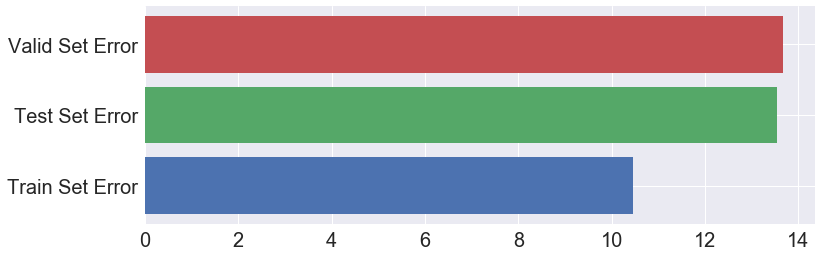

In [19]:
plt.figure(figsize=(12,4))
plt.barh('Train Set Error', acc_train[1])
plt.barh('Test Set Error', acc_test[1])
plt.barh('Valid Set Error', acc[1])

plt.show()

#### The model did not overfit as it performed well on the valid set, but generalized better on the test set which was kept hidden throught the training phase

In [31]:
# Extract single tree
estimator = final_model_r.estimators_[5]

NameError: name 'final_model_r' is not defined

In [21]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = train_X.columns,
                class_names = train_y,
                rounded = True, proportion = False, 
                precision = 2, filled = True)